# Class dữ liệu logic trong ngôn ngữ R

### Lê Ngọc Khả Nhi

## Giới thiệu:

Như mọi ngôn ngữ lập trình khác, R cũng có kiểu dữ liệu boolean (Đúng/Sai), với tên gọi là logical. Trong bài hôm nay, chúng ta sẽ tìm hiểu về kiểu dữ liệu logical này và những ứng dụng của nó.

## Giá trị của R logical data class

Logical class trong R chỉ nhận 1 trong 2 giá trị: TRUE hoặc FALSE.
Bạn chú ý là phải viết chữ in hoa (khác với True/False trong Python).
Ta cũng có thể viết tắt là T hoặc F

In [4]:
class(T)

[1] "logical"

In [7]:
class(TRUE)

[1] "logical"

In [8]:
class(F)

[1] "logical"

In [9]:
class(FALSE)

[1] "logical"

## Hàm as.logical: hoán chuyển số và chữ thành dữ liệu logic

Hàm as.logical sẽ hoán chuyển một con số thành kiểu logical, với quy luật: tất cả giá trị khác zero sẽ được gọi là TRUE, chỉ duy nhất giá trị zero (0) được gọi là FALSE

In [98]:
as.logical(0)

[1] FALSE

In [99]:
as.logical(-1.5)

[1] TRUE

In [100]:
as.logical(5)

[1] TRUE

Hàm as.logical cũng áp dụng được cho dữ liệu character (kí tự), tuy nhiên nó chỉ hoạt động rất giới hạn trong một số trường hợp:

'T', 'True', 'true', 'TRUE' sẽ chuyển thành TRUE
'F' và 'False', 'false','FALSE' sẽ thành FALSE

ngoài ra, nó sẽ không hoạt động với bất cứ thứ gì khác, nó sẽ trả về giá trị NA

In [115]:
as.logical('T')

[1] TRUE

In [120]:
as.logical('true')

[1] TRUE

In [116]:
as.logical('True')

[1] TRUE

In [119]:
as.logical('Yes')

[1] NA

Công dụng này sẽ giúp ta chuẩn hóa những dataset có lỗi quên viết hoa chữ True hoặc False

## Dữ liệu logic cũng là con số 1 và 0

R cho phép làm việc với biến logic như con số, theo quy tắc nhị phân: TRUE = 1 còn FALSE = 0, thí dụ nếu bạn lấy tổng 3 giá trị TRUE, thì sẽ có kết quả = 3

In [101]:
TRUE + TRUE + TRUE

[1] 3

Lợi dụng quy tắc này, ta có thể làm thống kê mô tả tần suất cho 1 biến nhị phân bằng hàm sum cho giá trị TRUE:

Trong thí dụ sau, ta có vector v gồm 4 giá trị T và 5 giá trị F

In [106]:
v = c(T,F,F,T,,F,F,T,F)

sum(v)
length(v) - sum(v)

[1] 4

[1] 5

Dĩ nhiên ta có thể làm bất cứ phép tính nào với biến logic, cũng như giữa biến logic và những kiểu dữ liệu khác:

In [109]:
F*(c(1,2,3,4,5))

[1] 0 0 0 0 0

## Toán tử logic

R cung cấp một hệ thống tính toán logic hoàn chỉnh, như trong bảng dưới đây:

| Toán tử  | Ý nghĩa|
|-----------------|--------|
| > | lớn hơn|
| < | nhỏ hơn|
| >= | lớn hơn hoặc bằng|
| <= | nhỏ hơn hoặc bằng|
| == | bằng|
| !F, !T | Phủ định logic|
| != | không bằng/khác với|
| %in% | đối chiếu 2 tập hợp |

Phần lớn các toán tử này có ý nghĩa so sánh hoặc kiểm định, kết quả của phép toán logic sẽ là giá trị logic: TRUE hoặc FALSE.

Trong công việc hằng ngày, ta sử dụng phép toán logic rất thường xuyên; ở cuối bài Nhi sẽ nêu lên một số thí dụ ứng dụng phép toán logic để lọc dữ liệu, phân nhóm, kiểm soát vòng lặp, vv

Sau đây là một số thí dụ đơn giản về phép so sánh

In [11]:
1 + 1 == 2

[1] TRUE

In [27]:
1 + 1 == 3

[1] FALSE

Nhi rất nhạc nhiên khi thấy R cho phép đặt toán tử so sánh trước phép tính số học trong câu lệnh, thí dụ như sau:

In [124]:
5 == 2 + 3

[1] TRUE

In [131]:
0.3 < 1/3

[1] TRUE

Tuy nhiên ta không thể lồng ghép 2 lần phép toán logic:

In [130]:
5 > 3 > 0

ERROR: Error in parse(text = x, srcfile = src): <text>:1:7: '>' inattendu(e)
1: 5 > 3 >
          ^


Một điều tế nhị mà ta cần chú ý khi so sánh 2 con số, đó là kết quả phụ thuộc vào độ chính xác của kiểu dữ liệu: integer hay float (double, numeric)

In [137]:
2L == 2.0

[1] TRUE

Không có vấn đề gì đáng bàn về độ tin cậy khi so sánh như trên giữa integer và numeric, vì cả 2 đều là giá trị chính xác, tuy nhiên khi giá trị mang tính xấp xỉ thì kết quả so sánh có thể làm bạn bất ngờ:

Khi cả 2 vế đều chính xác tuyệt đối, không có gì để bàn...

In [140]:
cos(pi) == -1

[1] TRUE

In [135]:
pi == 3.14

[1] FALSE

Trong thí dụ trên, pi là 1 hằng số với độ chính xác cao hơn rất nhiều so với 3.14, do đó khi ta nghĩ rằng pi = 3.14 chỉ là xấp xỉ, nhưng máy tính làm việc một cách chính xác.

Trong 2 thí dụ dưới đây, bạn sẽ thấy độ chính xác có thể ảnh hưởng thế nào lên kết quả so sánh: Khi ta xấp xỉ 1/10^308 thì kết quả vẫn còn >0, tuy nhiên khi tăng từ 10^308 lên 10^309 thì kết quả sẽ là con số vô cùng nhỏ, được xấp xỉ gần như tương đương với số 0.

In [210]:
0 == 1.0/10^308

[1] FALSE

In [209]:
0 == 1.0/10^309

[1] TRUE

Tương tự, nếu ta cộng phần dư rất nhỏ vào 1 giá trị, sự thay đổi là rất ít nên phép so sánh cho ra kết quả tương đương

In [230]:
1/10 == 0.1 + 1/10^10

[1] FALSE

In [235]:
1/10 == 0.1 + 1/10^18

[1] TRUE

Những toán tử so sánh không chỉ áp dụng được cho từng giá trị riêng lẻ, nhưng còn dùng được cho chuỗi/tập hợp giá trị, thí dụ ta có thể so sánh tuần tự từng phần tử trong 1 vector và 1 giá trị đích:

In [63]:
c(1,2,3,4,5) > 3

[1] FALSE FALSE FALSE  TRUE  TRUE

Ta có thể đặt giá trị đích bên vế phải hay trái đều được:

In [144]:
3 < c(1,2,3,4,5)

[1] FALSE FALSE FALSE  TRUE  TRUE

Tuy nhiên, khi so sánh 2 tập hợp nhiều phần tử thì có thể phức tạp hơn: Có 3 trường hợp có thể xảy ra: khi kích thước 2 tập hợp là như nhau, hoặc chia hết (vector dài có kích thước là bội số của vector ngắn), hoặc cả 2 có kích thước bất kì. 

Trong cả 3 trường hợp, phép so sánh sẽ là bắt cặp tuần tự, thí dụ như sau:

Khi 2 vector X,Y có kích thước bằng nhau, sự so sánh sẽ là bắt cặp tuần tự: Xi so với Yj
Thí dụ:

In [99]:
c(2,6/2,16^0.5,10*0.5) == c(2,3,4,5)

[1] TRUE TRUE TRUE TRUE

In [69]:
c(1,2,3,4,5) > rep(3,5)

[1] FALSE FALSE FALSE  TRUE  TRUE

Phép so sánh này tương đương với c(1,2,3,4,5) > 3, vì vế phải có độ dài = 5 và toàn là số 3.

Còn nếu vector dài không có kích thước là bội số của vector ngắn, sự bắt cặp tuần tự vẫn diễn ra, nhưng sẽ có 1 phần tử không được so sánh do không tìm ra giá trị bắt cặp với nó:

In [92]:
c(3,4,5) > c(3,5)

Warning message in c(3, 4, 5) > c(3, 5):
"la taille d'un objet plus long n'est pas multiple de la taille d'un objet plus court"

[1] FALSE FALSE  TRUE

In [147]:
c(1,2,3,4,5,6) < c(1,2,3,4)

Warning message in c(1, 2, 3, 4, 5, 6) < c(1, 2, 3, 4):
"la taille d'un objet plus long n'est pas multiple de la taille d'un objet plus court"

[1] FALSE FALSE FALSE FALSE FALSE FALSE

In [152]:
c(1,2,3,4,5,6) < c(3,5)

[1]  TRUE  TRUE FALSE  TRUE FALSE FALSE

Trong thí dụ trên: vector dài có kích thước là bội số của độ dài vector ngắn nên việc bắt cặp diễn ra dễ dàng
1,3,5 sẽ được so sánh với 3, còn 2,4,6 sẽ được so với 5.

Nói chung, nên tránh so sánh các vector có độ dài khác nhau, vì kết quả rất khó diễn giải

kí hiệu ! có nghĩa phủ định khi áp dụng trực tiếp lên giá trị logic, thí dụ !F là TRUE, !T là FALSE

In [154]:
!T

[1] FALSE

In [155]:
!F

[1] TRUE

In [170]:
!1

[1] FALSE

In [171]:
!0

[1] TRUE

In [156]:
!(3 < 5)

[1] FALSE

In [157]:
!(c(1,2,3)> 0)

[1] FALSE FALSE FALSE

Toán tử %in% dùng để kiểm tra 1 tập hợp A có phải nằm trong tập B hay không, %in% rất tiện lợi để lọc dữ liệu:

Chú ý là kết quả là của vế trái (đối tượng cần kiểm định), còn vế phải là đích tham chiếu:

In [158]:
c(1,2,3,4,5) %in% c(1,2,3)

[1]  TRUE  TRUE  TRUE FALSE FALSE

In [159]:
c(1,2,3) %in% c(1,2,3,4,5,6)

[1] TRUE TRUE TRUE

## Sự tổ hợp: 

Nếu như Python sử dụng keyword (and, or) cho sự tổ hợp các giá trị logic, thì R lại dùng kí hiệu đặc biệt:
& tương đương với "and", còn | tương đương với "or" 

Quy luật kết hợp được trình bày như sau đây:

Đúng và Đúng = Đúng

In [108]:
T & T

[1] TRUE

In [125]:
1 + 1 == 2 & 1 + 2 == 3

[1] TRUE

In [276]:
v = c(1,2,3,4,5,6)

v

v >= 2 & v %%2 ==0

[1] 1 2 3 4 5 6

[1] FALSE  TRUE FALSE  TRUE FALSE  TRUE

Sai và Đúng = Sai
Đúng và Sai = Sai

In [112]:
F & T

[1] FALSE

In [111]:
T & F

[1] FALSE

In [275]:
v = rbinom(10,1,0.5)

v

v!=0 & v <= 1

[1] 1 1 0 1 1 0 0 1 1 1

[1]  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE

Sai và Sai = Sai

In [165]:
F & FALSE

[1] FALSE

In [166]:
!T & F

[1] FALSE

In [113]:
F & F

[1] FALSE

In [135]:
"a" == "A" & "a" != "b"

[1] FALSE

In [162]:
log(1) & 1/3 > 1.3

[1] FALSE

Trong thí dụ trên, có chút lắt léo: log(1) = 0, và 0 được diễn giải như FALSE...
Tương tự như thí dụ sau đây: !1 chính là FALSE...

In [169]:
!1 & c(1,2,3) > 0

[1] FALSE FALSE FALSE

Chỉ cần 1 giá trị F chen vào chuỗi logic thì kết quả vẫn là False (sai)

In [172]:
T & T & T & T & F

[1] FALSE

In [285]:
set.seed(123)
v1 = rbinom(10,1,0.5)
v2 = rbinom(10,1,0.3)

v1
v2

v1 == v2 & v1 != 0

[1] 0 1 0 1 1 0 1 1 1 0

[1] 1 0 0 0 0 1 0 0 0 1

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

Còn sau đây là các quy luật kết hợp với "hoặc". Lưu ý rằng khái niệm "Hoặc" trong logic có ý nghĩa "bao gồm cả 2", trái với "hoặc" trong ngôn ngữ tự nhiên có ý nghĩa loại trừ lẫn nhau (tôi sẽ mua cái này hoặc cái kia)

Đúng | Đúng = Đúng

In [116]:
T | T

[1] TRUE

In [252]:
v = c(-1, 0, 1, 2, 3)

v > 0 | v != 0

[1]  TRUE FALSE  TRUE  TRUE  TRUE

Đúng | Sai = Đúng

In [117]:
T | F

[1] TRUE

In [173]:
v1 = c(1,2,3)
v2 = c(1,2,3,4,5,6)
v3 = c(7,8,9)

v1
v2

v1 %in% v2 
v1 %in% v3

v1 %in% v2  | v1 %in% v3

[1] 1 2 3

[1] 1 2 3 4 5 6

[1] TRUE TRUE TRUE

[1] FALSE FALSE FALSE

[1] TRUE TRUE TRUE

Sai | Đúng = Đúng luôn 

In [118]:
F | T

[1] TRUE

In [6]:
v = c(1,0,2,3)

v

v != 0

v != 2

v != 0 | v != 2

[1] 1 0 2 3

[1]  TRUE FALSE  TRUE  TRUE

[1]  TRUE  TRUE FALSE  TRUE

[1] TRUE TRUE TRUE TRUE

Sai | Sai = Sai

In [119]:
F | F

[1] FALSE

## Ứng dụng của phép toán logic trong R

## 1) Chọn lọc dữ liệu

In [174]:
df = data.frame('Group' = rep(c('Case','Control'),3),
               'Score' = rnorm(n=6)
               )

df

Group,Score
Case,0.08836527
Control,1.12329916
Case,0.66888965
Control,0.44404415
Case,-1.36442379
Control,-0.13979784


Cho một dataframe gồm Phân nhóm và giá trị Score, ta có thể lọc riêng những trường hợp thuộc 1 phân nhóm và loại bỏ những trường hợp còn lại:

In [175]:
df[df$Group == 'Case',]

,Group,Score
1,Case,0.08836527
3,Case,0.66888965
5,Case,-1.36442379


Cơ chế của thao tác này đó là khi ta so sánh vector df$Group với giá trị "Case", ta đã tạo ra một logical mask, dùng mask này như index cho dataframe, ta loại bỏ những hàng mang giá trị FALSE

In [176]:
mask = df$Group != "Control"

mask

df[mask,]

[1]  TRUE FALSE  TRUE FALSE  TRUE FALSE

,Group,Score
1,Case,0.08836527
3,Case,0.66888965
5,Case,-1.36442379


Bạn cũng có thể thay T, F bằng 1,0, nhưng chú ý rownames khác hẳn...

In [177]:
mask = c(1,0,1,0,1,0)

df[mask,]

,Group,Score
1,Case,0.08836527
1.1,Case,0.08836527
1.2,Case,0.08836527


Ta có thể dùng toán tử phủ định để đảo ngược mask logic:

In [179]:
mask = df$Group != "Control"

mask

df[!mask,]

[1]  TRUE FALSE  TRUE FALSE  TRUE FALSE

,Group,Score
2,Control,1.1232992
4,Control,0.4440442
6,Control,-0.1397978


## 2) Dùng giá trị logic để kiểm soát vòng lặp

Như các ngôn ngữ lập trình khác, R cũng có các từ khóa if, else để phân nhánh trong một quy trình. Một cách tự nhiên, if keyword được kết hợp với giá trị logic (phép so sánh hoặc kiểm định).

Trong thí dụ sau, cũng với dataframe df ở trên, ta muốn in ra tất cả giá trị dương, còn với giá trị âm thì in ra dòng chữ: "pass: negative", để làm việc này ta đặt 1 điều kiện if giữa vòng lặp for.

In [180]:
for (i in c(1:6)){
    if (df$Score[i] >= 0) {
        print(df$Score[i])}
    else {print("pass: negative")}
}

[1] 0.08836527
[1] 1.123299
[1] 0.6688897
[1] 0.4440442
[1] "pass: negative"
[1] "pass: negative"


## 3) Tạo biến nhị phân

Phép toán logic được dùng để tạo ra biến nhị phân, thậm chí một cách "on the fly" (không lưu lại kết quả, chỉ sử dụng 1 lần). 

In [188]:
df = data.frame("Score" = rnorm(100))

head(df)

Score
-3.1703962
-0.5997533
0.3567888
2.0605253
0.3818218
-0.5202778


Trong thí dụ thứ nhất, ta dựng một mô hình tuyến tính ước tính trung bình những giá trị dương và trung bình những giá trị âm của biến Score, điều này có vẻ hơi nhảm nhí nhưng về mặt kỹ thuật hoàn toàn khả thi;

In [192]:
mod = glm(data = df, Score ~ Score>0 )

summary(mod)


Call:
glm(formula = Score ~ Score > 0, data = df)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.87498  -0.49731  -0.02418   0.52614   2.10621  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -0.9076     0.1012  -8.966 2.12e-14 ***
Score > 0TRUE   1.6906     0.1509  11.203  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.5635994)

    Null deviance: 125.971  on 99  degrees of freedom
Residual deviance:  55.233  on 98  degrees of freedom
AIC: 230.43

Number of Fisher Scoring iterations: 2


Trong thí dụ thứ 2, ta dùng 1 biến nhị phân để tô màu phân biệt giá trị Âm, dương trong một scatter plot:

Warning message:
"Width not defined. Set with `position_dodge(width = ?)`"

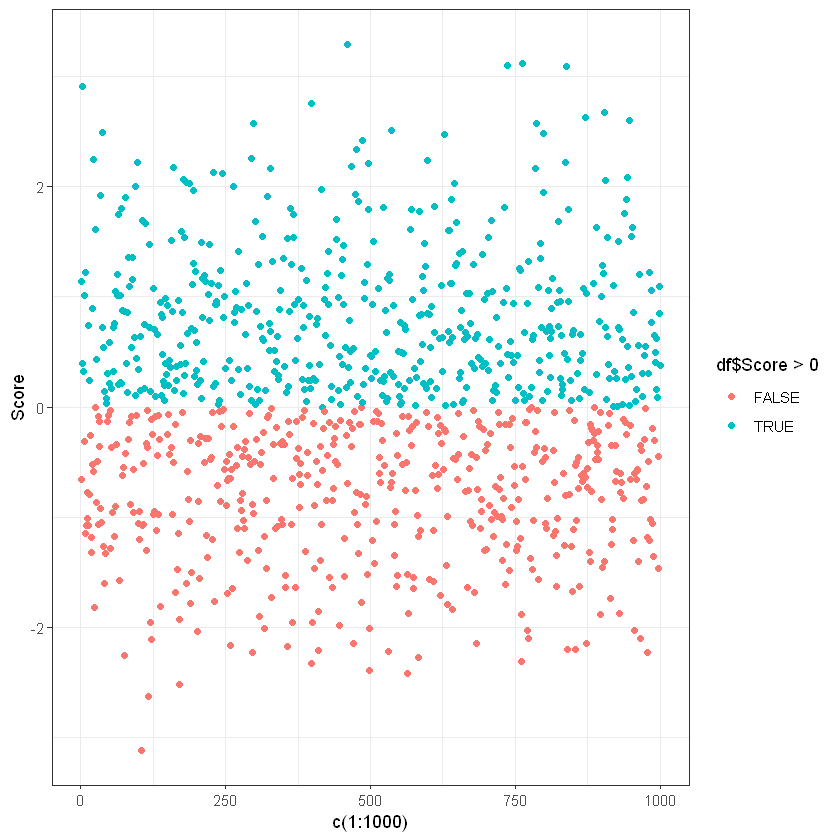

In [58]:
library(ggplot2)

df = data.frame("Score" = rnorm(n=1000))

ggplot(data = df, aes(x = c(1:1000), 
                      y= Score, 
                      col = df$Score >0))+
geom_point(position = 'dodge')+
theme_bw()

Trong thí dụ cuối cùng, các bạn sẽ thấy ứng dụng linh hoạt của phép kiểm định tập hợp %in% khi mô phỏng trò chơi "Tài xỉu".

Đầu tiên, ta mô phỏng thí nghiệm tung đồng xu với quy luật binomial với xác suất 0.5 (fair coin):

In [87]:
result = vector(length = 1000)

i = 0
while (i<=1000){
    result[i] = as.character(rbinom(1,1,0.5))
    i = i + 1 
}

Hmisc::describe(result)

result 
       n  missing distinct 
    1000        0        2 
                      
Value          0     1
Frequency    497   503
Proportion 0.497 0.503

Bây giờ, ta mở rộng hàm rbinom cho một con xúc xắc 6 mặt, sau đó kết hợp với 1 điều kiện if và %in% để gán giá trị Odd hay Even tùy theo kết quả điểm gieo được, mô phỏng 10000 lần ta sẽ có kết quả như sau:

In [201]:
result = vector(length = 10000)

i = 0
while (i<=10000){
    roll = as.character(rbinom(1,6,1/6))
    if (roll %in% c(1,3,5)){res = 'Odd'}
    else{res = "Even"}
    result[i] = res
    i = i + 1 
}

Hmisc::describe(result)

result 
       n  missing distinct 
   10000        0        2 
                    
Value      Even  Odd
Frequency  5403 4597
Proportion 0.54 0.46

Bài đến đây tạm dừng, chúc các bạn thực hành vui...